In [14]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def orbit(m,k,alph,r_d, r_0):
    #Creating time constants, all in seconds
    ts = 1e-4 #Time step
    t = 0
    t_tot = 50 #Total time
    
    p_crit = np.sqrt(-alph*k*r_0**(alph+2)) #Critical momentum value (for r_0)
    p_th = (1/3) * p_crit #Arbitrary fractional value of the critical theta momentum
    
    rs = [r_0] #Array for particle positions
    ths = [(p_th / (m*r_0**2)) * ts] #Theta values for varying times
    while t < t_tot:
    
        r_dd = p_th**2/(m**2*rs[-1]**3) + (alph*k*rs[-1]**(alph-1)/m) #Using eqn (4)
        r_d = r_d + r_dd * ts #Forward integration
        r = 0.5 * r_dd * ts**2 + r_d * ts + rs[-1] #Forward integrating again
        
        t += ts 
        ths.append(ths[-1] + (p_th / ((m*r**2)) * ts))
        rs.append(r)
    
    return rs,ths

In [9]:
#Constants
m = 1
r_0 = 1
r_d = 0
alph = np.linspace(-1,2,5)

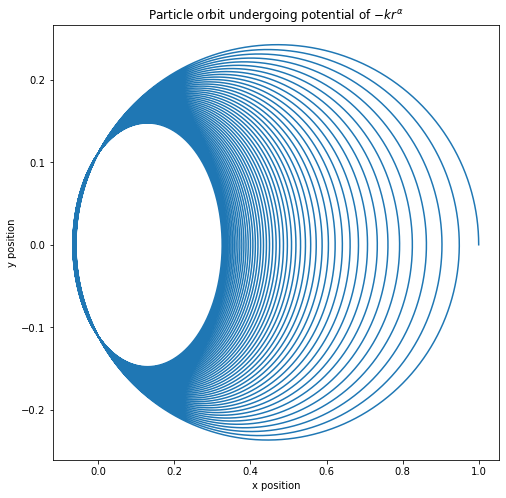

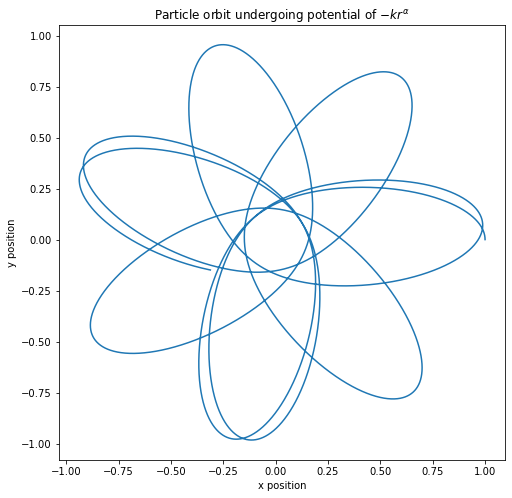

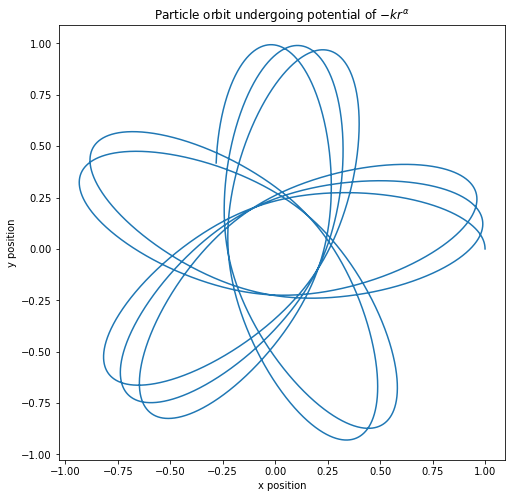

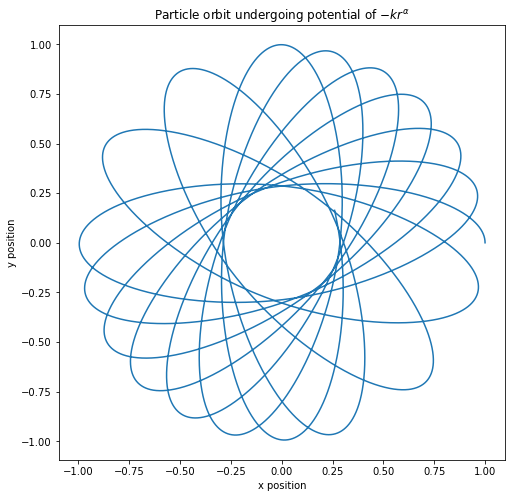

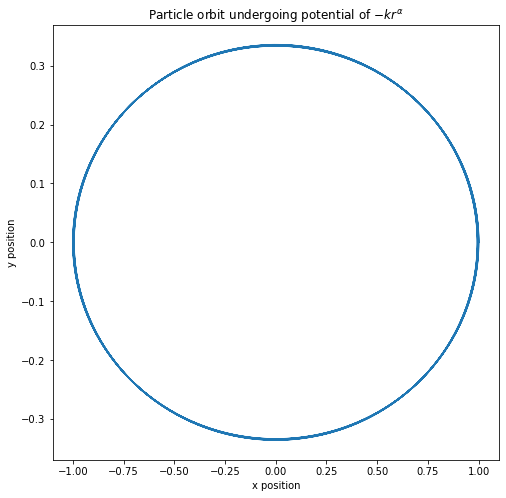

In [13]:
for power in alph:
    #Choosing k such that it is always the opposite sign of alpha
    if power > 0:
        k = -1
    else:
        k = 1
    #Applying the function
    r,th = orbit(m,k,power,r_d,r_0)
    #Converting to cartesian
    x = r * np.cos(th)
    y = r * np.sin(th)
    #Plotting
    plt.figure(figsize = (8,8))
    plt.plot(x,y)
    plt.xlabel("x position")
    plt.ylabel("y position")
    plt.title("Particle orbit undergoing potential of $-kr^\\alpha$")

From the above plots, it is shown that the only closed orbits are for alpha = -1 (first plot), and alpha = 2 (last plot).